In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#%matplotlib inline  
#%matplotlib notebook
#%pylab

In [ ]:
b = 10;
f = lambda x,y: (x-1)**2 + b*(y-x**2)**2;

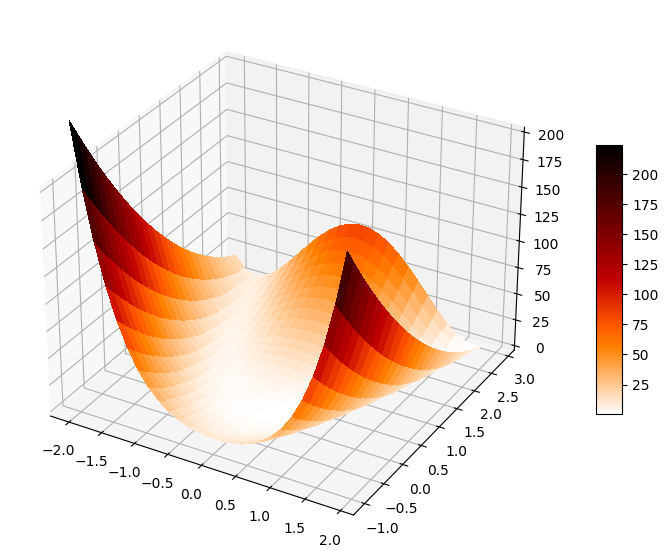

In [ ]:
# Initialize figure 
figRos = plt.figure(figsize=(12, 7))
axRos = figRos.add_subplot(projection='3d')

# Evaluate function
X = np.arange(-2, 2, 0.15)
Y = np.arange(-1, 3, 0.15)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

# Plot the surface
surf = axRos.plot_surface(X, Y, Z, cmap=cm.gist_heat_r,
                       linewidth=0, antialiased=False)
axRos.set_zlim(0, 200)
figRos.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

In [ ]:
df = lambda x,y: np.array([2*(x-1) - 4*b*(y - x**2)*x, \
                         2*b*(y-x**2)])

Optimization


In [ ]:
F = lambda X: f(X[0],X[1])
dF = lambda X: df(X[0],X[1])

In [ ]:
x0 = np.array([-1.4,1.1])
print(F(x0))
print(dF(x0))

13.155999999999993
[-52.96 -17.2 ]


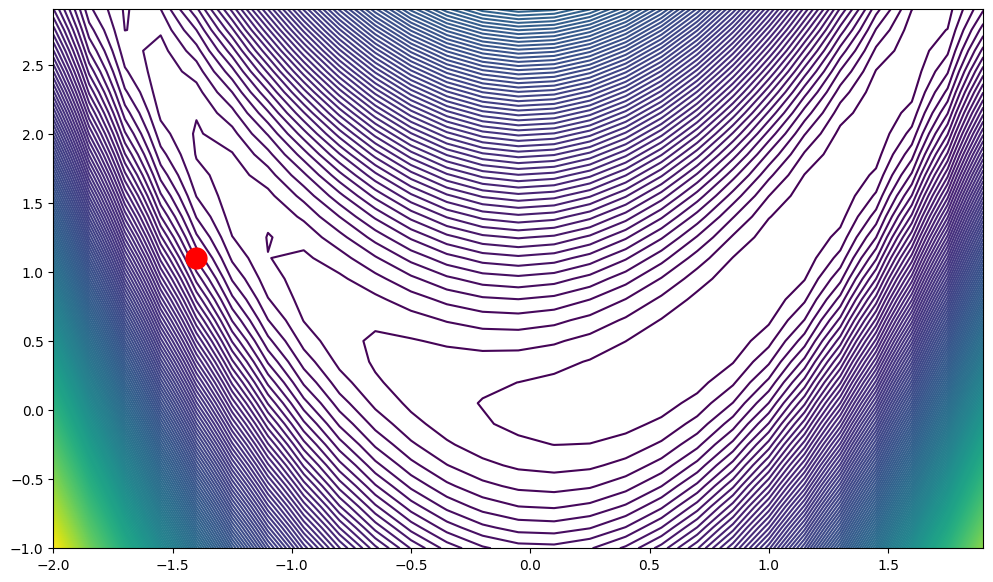

In [ ]:
# Initialize figure 
plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)
plt.plot([x0[0]],[x0[1]],marker='o',markersize=15, color ='r')

In [ ]:
#Find a descent direction

fx = F(x0);
gx = dF(x0);
s = -gx;
print(s)

[52.96 17.2 ]


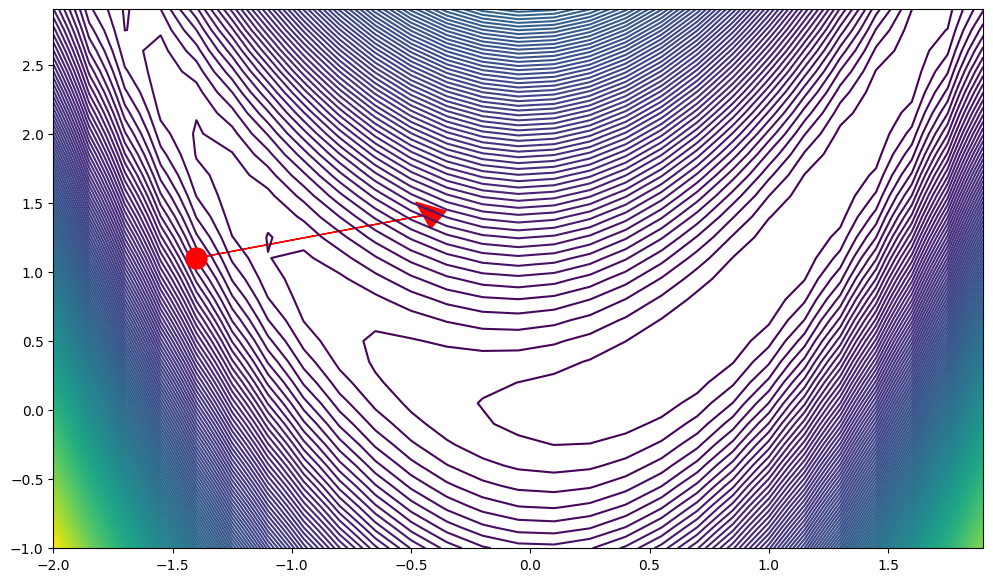

In [ ]:
# Initialize figure 
plt.figure(figsize=(12, 7))
plt.contour(X,Y,Z,200)
ns = np.sqrt(s[0]**2+s[1]**2);
plt.plot([x0[0]],[x0[1]],marker='o',markersize=15, color ='r')
plt.arrow(x0[0],x0[1],s[0]/ns,s[1]/ns, head_width=0.2, head_length=0.1, fc='r', ec='r')

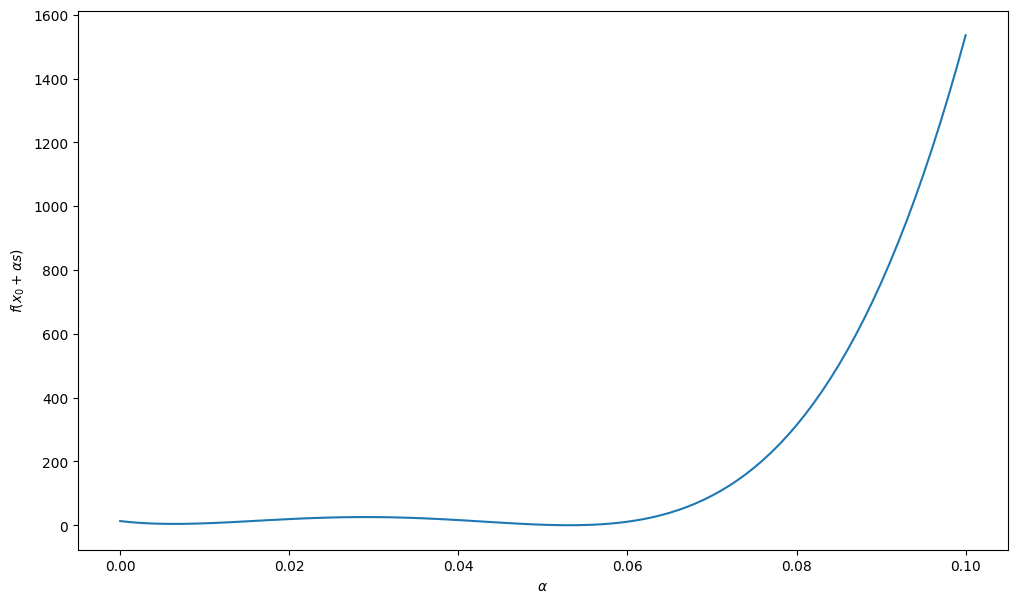

In [ ]:
#Find  α that minimizes  f(x0+αs)

al = np.linspace(0,0.1,101)
z = [F(x0+a*s) for a in al]
figLS = plt.figure(figsize=(12, 7))
plt.plot(al,z)
plt.ylabel('$f(x_0+ \\alpha s)$')
plt.xlabel('$\\alpha$')
plt.show()


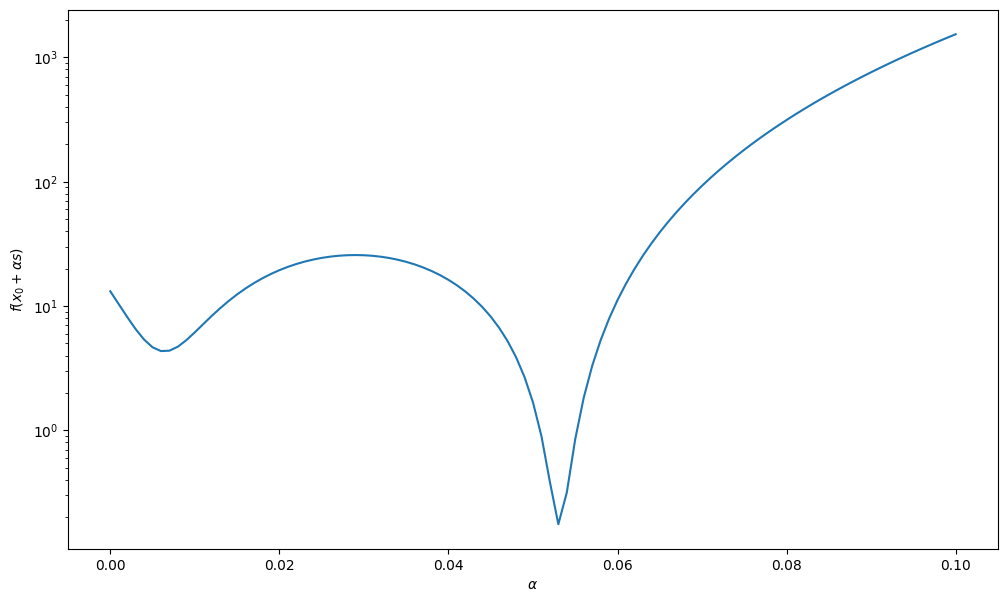

In [ ]:
figLS = plt.figure(figsize=(12, 7))
plt.plot(al,z)
plt.yscale('log')
plt.ylabel('$f(x_0+ \\alpha s)$')
plt.xlabel('$\\alpha$')
plt.show()

In [ ]:
[fx,fx+0.01*d]

[13.155999999999993, 10.055398399999996]

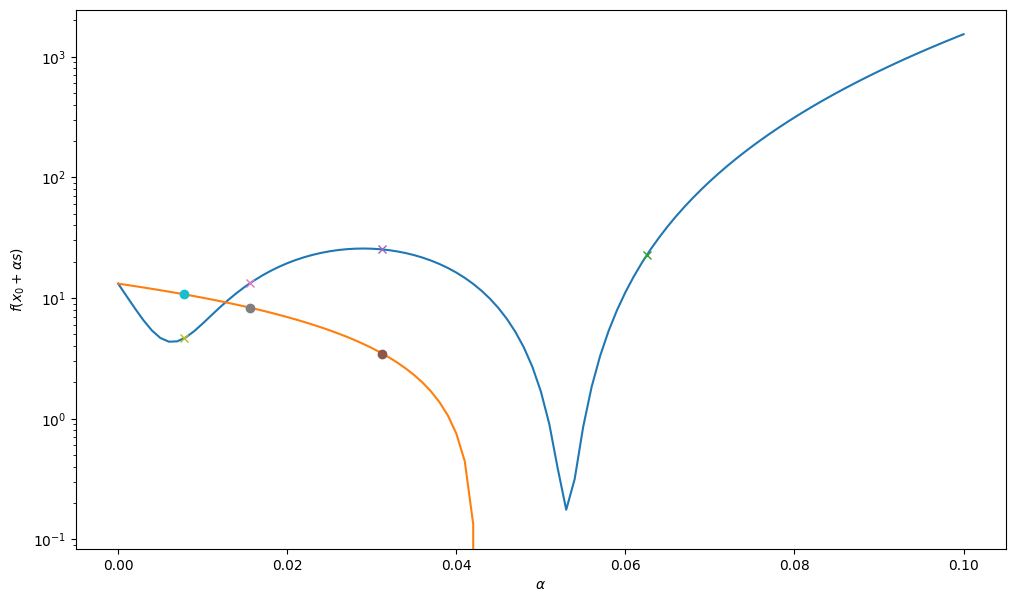

In [ ]:
theta = 0.1
alpha = 1
tol = 1e-10
d = theta*np.dot(gx,s)

figLS1 = plt.figure(figsize=(12, 7))
plt.plot(al,z)
plt.plot(al,[fx+a*d for a in al])

for i in range(10):
    
    if (alpha<=0.1):
        plt.plot(alpha,F(x0+alpha*s),marker='x');
        plt.plot(alpha,fx + alpha*d,marker='o')
        
    if F(x0+alpha*s) < (fx + alpha*d):
        break;
    alpha = alpha/2;
    
plt.yscale('log')
plt.ylabel('$f(x_0+ \\alpha s)$')
plt.xlabel('$\\alpha$')
plt.show()

In [ ]:
alpha

0.0078125